In [25]:
import pandas as pd
df=pd.read_csv('train.csv')

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,482.000000,486.000000,459.000000
mean,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [27]:
#seperating features (X) and outcome(y) from historical data
X=df.drop(['Loan_Status','Loan_ID'], axis=1)
y=df['Loan_Status']
print(X.shape)


(500, 11)


In [28]:
#Handling Null Values
X.isnull().sum()


Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [29]:
X['Gender'].value_counts()


Male      400
Female     91
Name: Gender, dtype: int64

In [30]:
X['Gender'].fillna("Male", inplace=True)


In [31]:
X.isnull().sum()

Gender                0
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [32]:
X['Married'].value_counts()


Yes    322
No     175
Name: Married, dtype: int64

In [33]:
X['Married'].fillna("Yes", inplace=True)
X.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [34]:
X['Dependents'].value_counts()

0     288
1      81
2      79
3+     40
Name: Dependents, dtype: int64

In [35]:
X['Dependents'].fillna("0", inplace=True)
X.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [36]:
X['Self_Employed'].value_counts()

No     407
Yes     66
Name: Self_Employed, dtype: int64

In [37]:
X['Self_Employed'].fillna("No", inplace=True)
X.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [38]:
mean_loan=X['LoanAmount'].mean()
X['LoanAmount'].fillna(mean_loan,inplace=True)
X.isnull().sum()


Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [39]:
X['Loan_Amount_Term'].fillna(X['Loan_Amount_Term'].mean(),inplace=True)

X['Credit_History'].fillna(X['Credit_History'].mean(),inplace=True)

X.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [40]:
#Now X does not have any null value
#One hot Encoding- Changing Categorical Values into numerical values
X=pd.get_dummies(X)
X.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,144.020747,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=30)
print(X_train.shape)

print(X_test.shape)

print(y_test.shape)
X_train.head()


(350, 20)
(150, 20)
(150,)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
12,3073,8106.0,200.0,360.00000,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
136,4583,0.0,84.0,360.00000,1.0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0
368,6325,0.0,175.0,360.00000,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0
367,5124,0.0,124.0,342.54321,0.0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
406,2167,2400.0,115.0,360.00000,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1


In [ ]:
#Applying Machine Learning Algorithm – Logistic Regression

from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()

Lr.fit(X_train,y_train)
#Lr now contains the model


In [ ]:
#Applying Machine Learning Algorithm – Support Vector Machines
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)
#svc is another ML model

In [61]:
#Applying Machine Learning Algorithm – Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#Stopping criteria: max_depth,Improvement in purity metric (like gini value),no of max population at leaf node
dtf1 = DecisionTreeClassifier(max_depth=3,criterion="gini",splitter="best")
dtf2 = DecisionTreeClassifier(max_depth=5,criterion="gini",splitter="best")
dtf3 = DecisionTreeClassifier(max_depth=8)
dtf1.fit(X_train, y_train)

dtf2.fit(X_train, y_train)
dtf3.fit(X_train, y_train)

print(dtf1.score(X_test,y_test))
print(dtf2.score(X_test,y_test))
print(dtf3.score(X_test,y_test))


0.76
0.78
0.7666666666666667


In [ ]:
from sklearn.naive_bayes import GaussianNB

n_b = GaussianNB()

n_b.fit(X_train, y_train)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  

knn.fit(X_train, y_train)
print(knn.score(X_test,y_test))


In [ ]:
#How to Predict using model
y_predict=Lr.predict(X_test)
y_predict1=svc.predict(X_test)
y_predict2=dtf.predict(X_test)
y_predict3=n_b.predict(X_test)
y_predict4=knn.predict(X_test)
df1=pd.DataFrame({'Actual':y_test,'Predicted_LR':y_predict,'Predicted_svc':y_predict1,'Predicted_dtr':y_predict2,'Predicted_nb':y_predict3,'Predicted_knn':y_predict4 })
df1.to_csv("Day16_Output.csv")


In [ ]:
#Score is simplest parameter to evaluate ML Model for classification problem
# Score=Total Matching/Total data
# Goal of a ML Classification problem is to achieve a score closer to 1.
print(Lr.score(X_test,y_test))
print(svc.score(X_test,y_test))
print(dtf.score(X_test,y_test))
print(n_b.score(X_test,y_test))
print(knn.score(X_test,y_test))

In [ ]:
#The model made by Logistic Regression Algorithm Lr is the best model so far

In [ ]:
#Deployment of model 
gender=input("What is your gender:")
married=input("Married:")
dependents=input("dependents value:")
Education=input("enter your education")
SelfEmployed=input("Self Employed:")
Applicantincome=int(input("enter applicant income"))
coapplicantincome=int(input("enter co applicant income:"))
loanamount=int(input("enter loan amount:"))
loanamountterm=int(input("enter loan amount term:"))
credithistory=int(input("enter credit history:"))
propertyarea=input("enter property area:")
data = [[gender,married,dependents,Education,SelfEmployed,Applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,propertyarea]]

newdf = pd.DataFrame(data, columns = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'])
newdf.head()


In [ ]:
newdf = pd.get_dummies(newdf)
newdf.head()

In [ ]:
X_train.columns

In [ ]:
missing_cols = set( X_train.columns ) - set( newdf.columns )
print(missing_cols)

In [ ]:
for c in missing_cols:
    newdf[c] = 0


In [ ]:
newdf = newdf[X_train.columns]

In [ ]:
yp=Lr.predict(newdf)
print(yp)


In [ ]:
if (yp[0]=='Y'):
    print("Your Loan is approved, Please contact at HDFC Bank Any Branch for further processing")
else:
    print("Sorry ! Your Loan is not approved")


In [44]:
print(X_train.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [45]:
from sklearn.tree import export_text,plot_tree
text_representation = export_text(dtf)
print(text_representation)

|--- feature_4 <= 0.42
|   |--- feature_1 <= 6981.50
|   |   |--- feature_0 <= 4316.50
|   |   |   |--- class: N
|   |   |--- feature_0 >  4316.50
|   |   |   |--- feature_0 <= 4366.50
|   |   |   |   |--- class: Y
|   |   |   |--- feature_0 >  4366.50
|   |   |   |   |--- feature_0 <= 4931.00
|   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |   |--- class: N
|   |   |   |   |--- feature_0 >  4931.00
|   |   |   |   |   |--- class: N
|   |--- feature_1 >  6981.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- class: Y
|   |   |--- feature_12 >  0.50
|   |   |   |--- class: N
|--- feature_4 >  0.42
|   |--- feature_2 <= 237.50
|   |   |--- feature_18 <= 0.50
|   |   |   |--- feature_3 <= 420.00
|   |   |   |   |--- feature_0 <= 1533.50
|   |   |   |   |   |--- feature_3 <= 240.00
|   |   |   |   |   |   |--- class: Y
|   |   |   |   |   |--- feature_3 >  240.00
|   |   |   |   |   |   |---

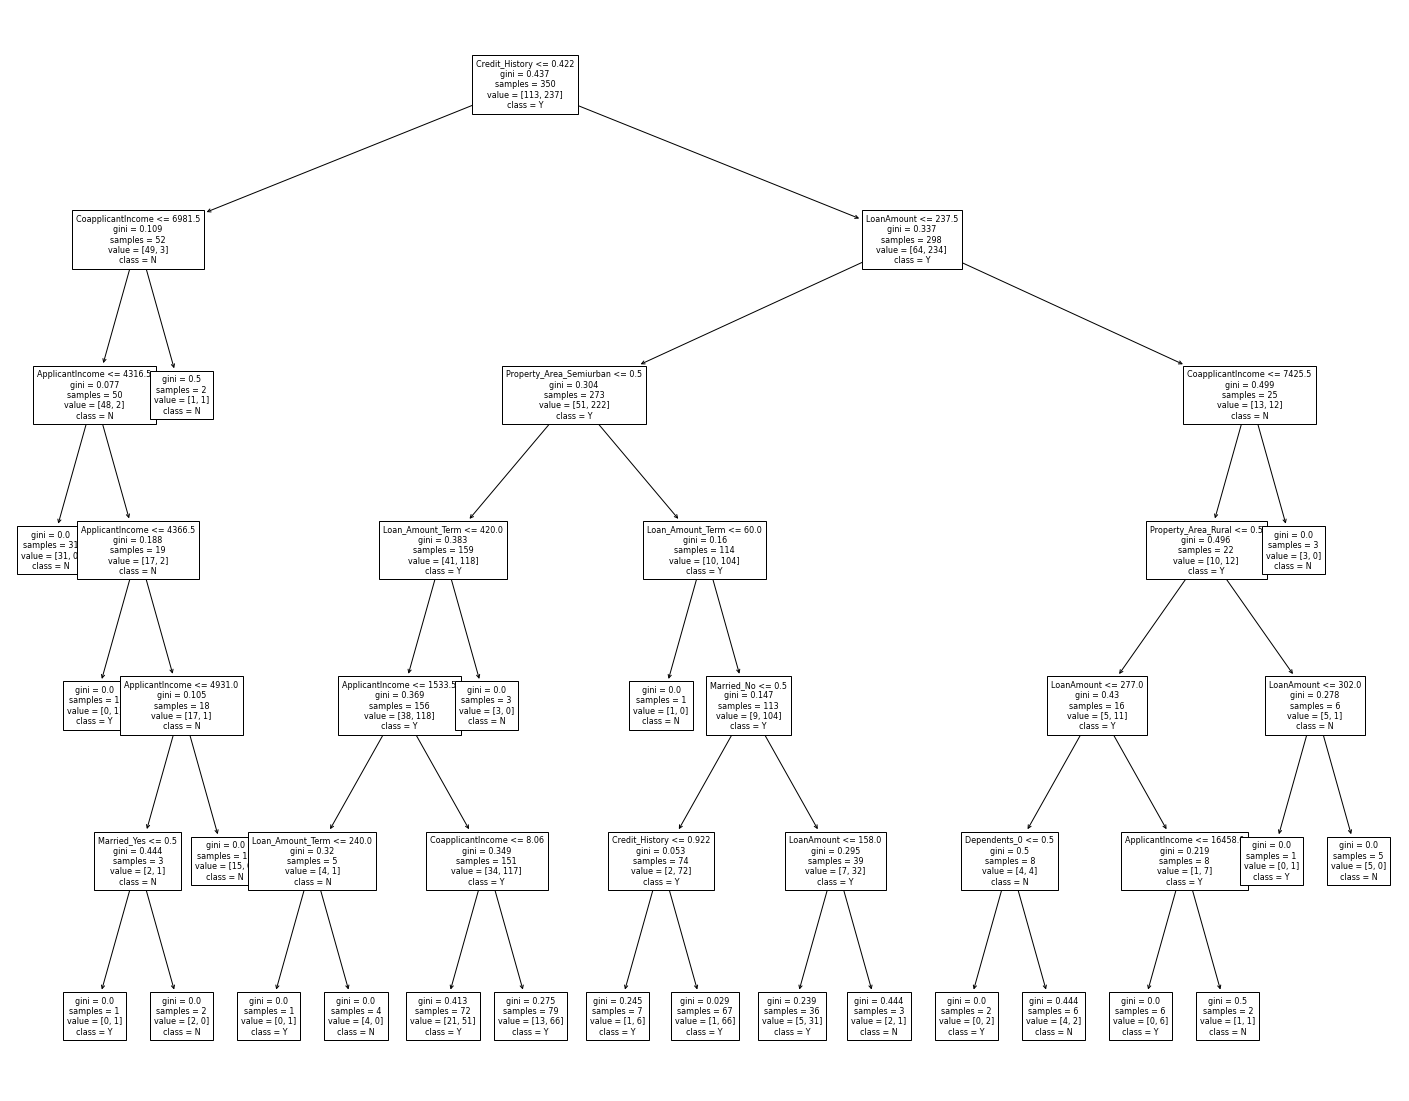

In [56]:
#Graph Representation
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
plot_tree(dtf,feature_names=X_train.columns,class_names=['N','Y'], fontsize=8)
plt.show()